In [2]:
# 생선 분류 문제
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [3]:
# 빙어 데이터 준비
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

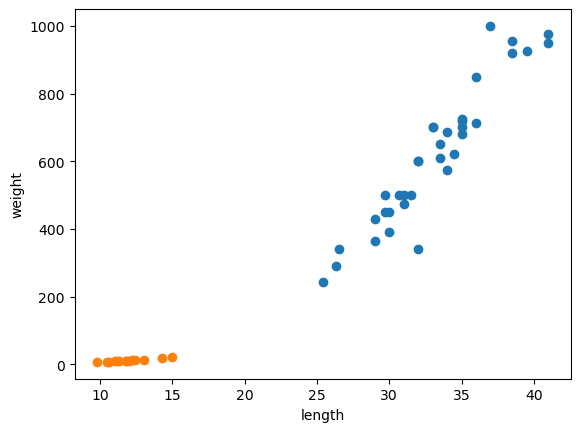

In [5]:
import matplotlib.pyplot as plt

# 도미 & 빙어 데이터 시각화
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [7]:
length = bream_length + smelt_length      # 두 개의 리스트를 이어붙인다!
weight = bream_weight + smelt_weight      # 이것도 이어붙이기! (단, length, weight가 pair로 들어가는 만큼, 순서가 중요함.)

fish_data = [[l, w] for l, w in zip(length, weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [9]:
len(bream_length)
len(smelt_length)

14

In [11]:
# 정답 만들기 (도미=1, 빙어)
fish_target = [1] * len(bream_length) + [0] * len(smelt_length)
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [13]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()         # 클래스 오브젝트 선언
kn.fit(fish_data, fish_target)      # 학습(fit)
kn.score(fish_data, fish_target)    # k-nearest neighborhood 알고리즘의 성능(정확도)

1.0

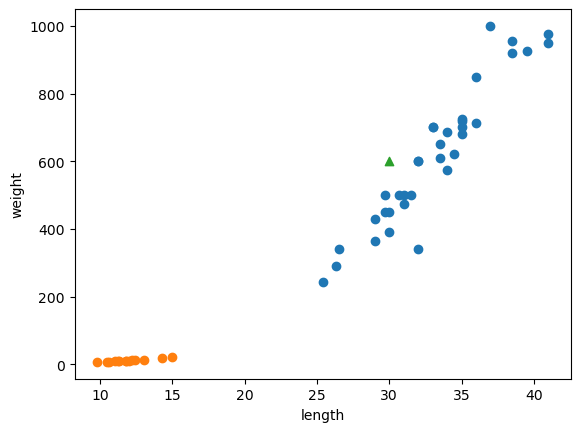

In [15]:
# 새로운 데이터로 학습 결과 확인
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker="^")              # 사람은 바로 구별할 수 있음 (=> 데이터 상, 요건 도미다!)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [17]:
# 임의의 데이터를 넣고 결과 확인
print("length=30, weight=600 테스트 데이터의 예측 결과: ", kn.predict([[30, 600]]))

length=30, weight=600 테스트 데이터의 예측 결과:  [1]


In [18]:
# 1이 나왔으므로 빙어

In [20]:
# 학습 데이터 확인하기
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
# 

In [22]:
kn49 = KNeighborsClassifier(n_neighbors=49)   # 보통 n_neighbors를 k 라고 부름!
kn49.fit(fish_data, fish_target)
print("정확도 : ", kn49.score(fish_data, fish_target))        # 정확도가 떨어졌습니다 ㅠㅠㅜㅠㅜㅜㅠ

정확도 :  0.7142857142857143


In [24]:
# 정확하게 도미놈들만 맞췄네요.
print(35/49)        # 도미데이터수/전체데이터수

0.7142857142857143


In [26]:
# 도미랑 빙어 데이터를 합친 데이터셋
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [27]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [28]:
# 총 49개의 샘플(sample) 중 35개를 훈련세트, 14개를 테스트세트로 사용 (우선 직접 인덱싱 해봅시다)
train_input  = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [29]:
# 모델 불러오기
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn = kn.fit(train_input, train_target)
print("Train 데이터셋에 대한 정확도(Train Accuracy): ", kn.score(train_input, train_target))
print("Test 데이터셋에 대한 정확도(Test Accuracy): ", kn.score(test_input, test_target))

Train 데이터셋에 대한 정확도(Train Accuracy):  1.0
Test 데이터셋에 대한 정확도(Test Accuracy):  0.0


😬 헉! 학습 데이터에 대해서는 정확도가 100%인데, 테스트 데이터에 대해서는 정확도가 0이네요..!<br>
왜 이럴까요?? 문제는 **샘플링편향(sampling bias)**에 있습니다!
<br><br>
방금 `train_input  = fish_data[:35]`으로 앞 부분의 35개만 학습 데이터로 가져왔죠?<br>
앞부분에는 도미 데이터만 가득 있어요.<br>
그래서 도미는 잘 학습 됐지만 빙어데이터는 전부 테스트세트로 지정되어서 전혀 학습되지 않은거죠.<br>
이렇게 train/valid/test를 나눌때는 데이터 속 **클래스의 비율**을 잘 고려해야해요.<br>
비율을 잘 고려해서 뽑는 방법은 두 가지가 대표적입니다.<br>

1. `sklearn.model_selection.train_test_split()` 사용
2. `np.shuffle()`로 직접 섞어주기

우리는 첫 번째 방법을 사용해볼겁니당

In [30]:
from sklearn.model_selection import train_test_split
# test_size는 앞선 예시의 test 데이터셋과 개수를 동일하게 하기 위해 설정한겁니다. 이렇게까지 세세히 설정 안하고 그냥 0.3으로 하셔도 됩니다.
X_train, X_test, y_train, y_test = train_test_split(fish_data, fish_target, test_size=0.28, random_state=1024, shuffle=True, stratify=fish_target)

In [31]:
print(f"학습데이터 수: {len(X_train)}, 테스트데이터 수: {len(X_test)}")

학습데이터 수: 35, 테스트데이터 수: 14


In [32]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn = kn.fit(X_train, y_train)
print("Train 데이터셋에 대한 정확도(Train Accuracy): ", kn.score(X_train, y_train))
print("Test 데이터셋에 대한 정확도(Test Accuracy): ", kn.score(X_test, y_test))

Train 데이터셋에 대한 정확도(Train Accuracy):  1.0
Test 데이터셋에 대한 정확도(Test Accuracy):  1.0


In [33]:
train_input, train_target, test_input, test_target = X_train, y_train, X_test, y_test

In [35]:
kn.predict([[1,300]])

array([1])

In [41]:
# 전처리
# 넘파이 배열로 변환
import numpy as np

train_input, train_target, test_input, test_target = np.array(train_input), np.array(train_target), np.array(test_input), np.array(test_target)

In [42]:
train_input

array([[  30. ,  450. ],
       [  38.5,  920. ],
       [  11.8,   10. ],
       [  38.5,  955. ],
       [  32. ,  600. ],
       [  11.2,    9.8],
       [  12. ,    9.8],
       [  32. ,  340. ],
       [  31.5,  500. ],
       [  37. , 1000. ],
       [  34. ,  685. ],
       [  33.5,  650. ],
       [  12.2,   12.2],
       [  31. ,  475. ],
       [  33. ,  700. ],
       [  34.5,  620. ],
       [  30. ,  390. ],
       [  25.4,  242. ],
       [  10.6,    7. ],
       [  29.7,  500. ],
       [  34. ,  575. ],
       [  15. ,   19.9],
       [  41. ,  950. ],
       [  32. ,  600. ],
       [  35. ,  725. ],
       [  26.5,  340. ],
       [  11.8,    9.9],
       [   9.8,    6.7],
       [  31. ,  500. ],
       [  11. ,    9.7],
       [  12.4,   13.4],
       [  29. ,  430. ],
       [  36. ,  850. ],
       [  35. ,  720. ],
       [  39.5,  925. ]])

In [39]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

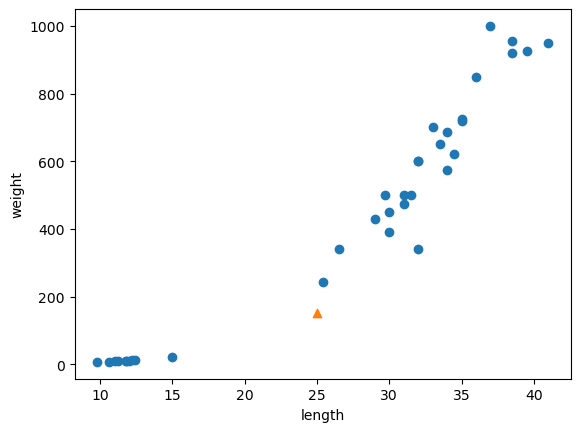

In [40]:
# 새로운 데이터
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])         # 이런 인덱싱은 넘파이에서만!
plt.scatter(25, 150, marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [43]:
print("새로운 length=25, weight=150 데이터의 예측 결과: ", kn.predict([[25,150]]))

새로운 length=25, weight=150 데이터의 예측 결과:  [0]


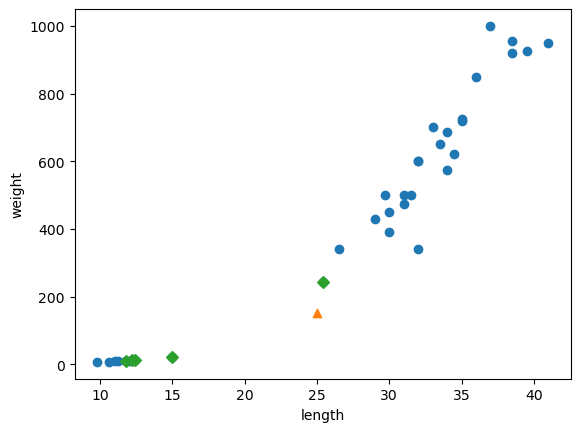

In [44]:
# 디폴트 k=5, [25,150]과 최근접 이웃들의 거리와 데이터 인덱스를 얻어서 확인해보자! (즉, 새로운 데이터 예측의 단서)
distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

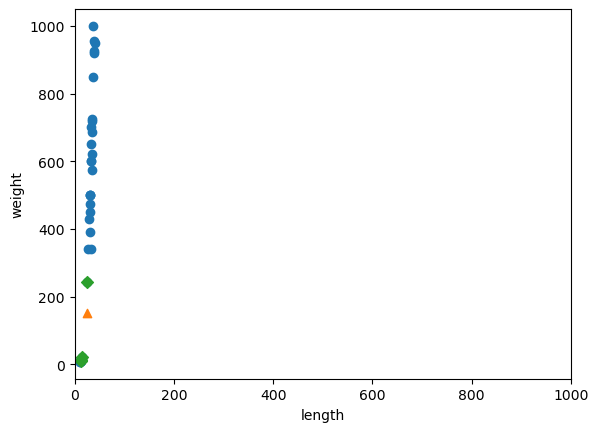

In [45]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))           # x축의 범위(limit)를 0~1000 사이로 맞춤
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [48]:
# Standardization
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [50]:
mean

array([ 27.06857143, 450.01142857])

In [51]:
std

array([ 10.21365393, 330.28803341])

In [47]:
train_input.shape

(35, 2)

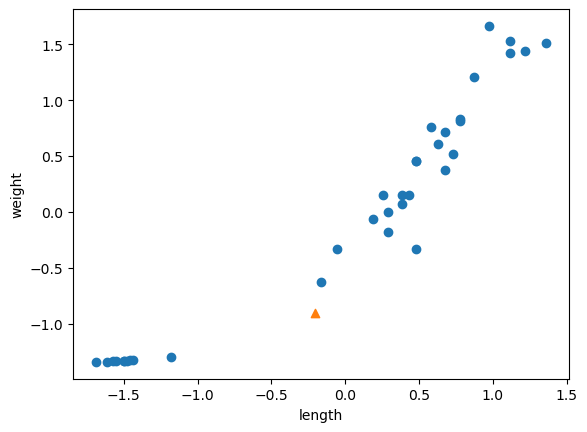

In [52]:
train_scaled = (train_input - mean) / std
new = ([25,150] - mean) / std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 산점도의 x,y축 범위가 -1.5~1.5 사이로 바뀌었다!

In [55]:
train_input.shape
train_input

array([[  30. ,  450. ],
       [  38.5,  920. ],
       [  11.8,   10. ],
       [  38.5,  955. ],
       [  32. ,  600. ],
       [  11.2,    9.8],
       [  12. ,    9.8],
       [  32. ,  340. ],
       [  31.5,  500. ],
       [  37. , 1000. ],
       [  34. ,  685. ],
       [  33.5,  650. ],
       [  12.2,   12.2],
       [  31. ,  475. ],
       [  33. ,  700. ],
       [  34.5,  620. ],
       [  30. ,  390. ],
       [  25.4,  242. ],
       [  10.6,    7. ],
       [  29.7,  500. ],
       [  34. ,  575. ],
       [  15. ,   19.9],
       [  41. ,  950. ],
       [  32. ,  600. ],
       [  35. ,  725. ],
       [  26.5,  340. ],
       [  11.8,    9.9],
       [   9.8,    6.7],
       [  31. ,  500. ],
       [  11. ,    9.7],
       [  12.4,   13.4],
       [  29. ,  430. ],
       [  36. ,  850. ],
       [  35. ,  720. ],
       [  39.5,  925. ]])

In [56]:
mean

array([ 27.06857143, 450.01142857])

In [57]:
 np.mean(train_input, axis=1)

array([240.  , 479.25,  10.9 , 496.75, 316.  ,  10.5 ,  10.9 , 186.  ,
       265.75, 518.5 , 359.5 , 341.75,  12.2 , 253.  , 366.5 , 327.25,
       210.  , 133.7 ,   8.8 , 264.85, 304.5 ,  17.45, 495.5 , 316.  ,
       380.  , 183.25,  10.85,   8.25, 265.5 ,  10.35,  12.9 , 229.5 ,
       443.  , 377.5 , 482.25])

In [58]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [59]:
test_scaled = (test_input-mean) / std

print(kn.score(test_scaled, test_target))

1.0


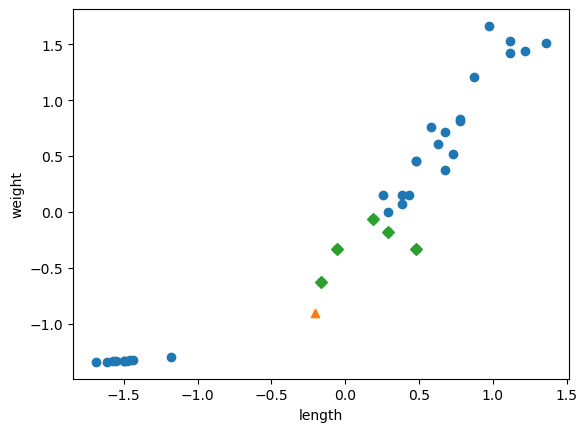

In [66]:
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker="^")
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [61]:
# 농어의 길이와 무게 데이터
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

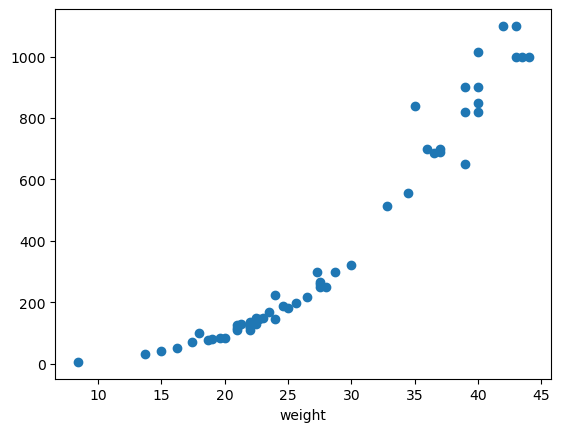

In [62]:
# 농어 데이터 시각화
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel("lenght")
plt.xlabel("weight")
plt.show()

In [63]:
# 훈련세트와 테스트세트로 분할
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [64]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))   # 결정계수

ValueError: Expected 2D array, got 1D array instead:
array=[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.